<center>
<img src="../../img/ml_theme.png">
# Дополнительное профессиональное <br> образование НИУ ВШЭ
#### Программа "Практический анализ данных и машинное обучение"
<img src="../../img/faculty_logo.jpg" height="240" width="240">
## Автор материала: старший преподаватель Факультета Компьютерных Наук ВШЭ, программист-исследователь Mail.ru Group  Юрий Кашницкий
</center>
Материал распространяется на условиях лицензии <a href="https://opensource.org/licenses/MS-RL">Ms-RL</a>. Можно использовать в любых целях, кроме коммерческих, но с обязательным упоминанием автора материала.

## <center>Домашнее задание 7. Визуализация многомерных данных в 2D и кластеризация. Решение</center>

In [1]:
from __future__ import division, print_function
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import load_breast_cancer, load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.manifold import TSNE

## Breaset Canser Wisconsin
Загружаем данные. Метки классов нужны только для оценки качества кластеризации.

In [2]:
data = load_breast_cancer()
X, y = data.data, data.target

In [3]:
np.bincount(y) #  0 - Malignant (212), 1 - Benign (357)

array([212, 357])

In [4]:
print(data['DESCR'])

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [5]:
X.shape

(569, 30)

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Визуализируйте данные в 2D-проекции, используя PCA. Предварительно отмасштабируйте выборку. Раскрасьте каждую точку в зависимости от целевого класса.**

Projecting 30-dimensional data to 2D


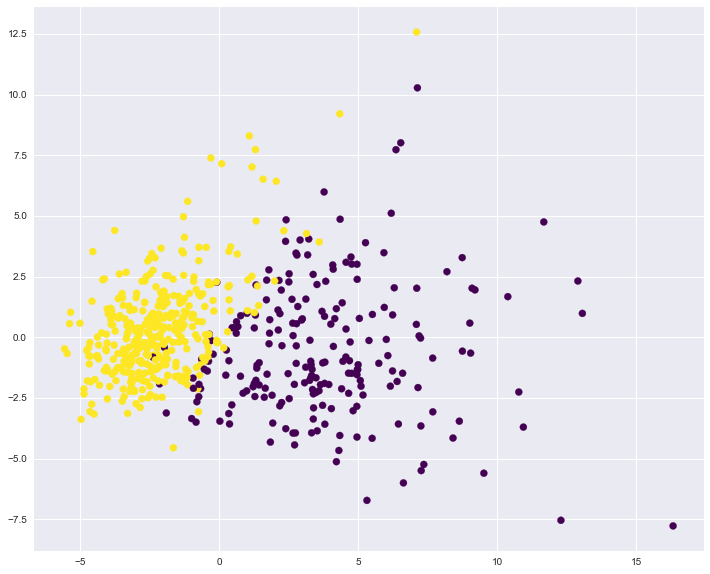

In [7]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

print('Projecting %d-dimensional data to 2D' % X.shape[1])

plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis', s=50)
plt.show()

**Используйте алгоритм `t-SNE` для построения двухмерного представления данных. Примените его к масштабированной выборке. Зафиксируйте `random_state`=17.**

In [8]:
%%time
tsne = TSNE(random_state=17)
tsne_representation = tsne.fit_transform(X_scaled)

CPU times: user 2.92 s, sys: 175 ms, total: 3.1 s
Wall time: 2.53 s


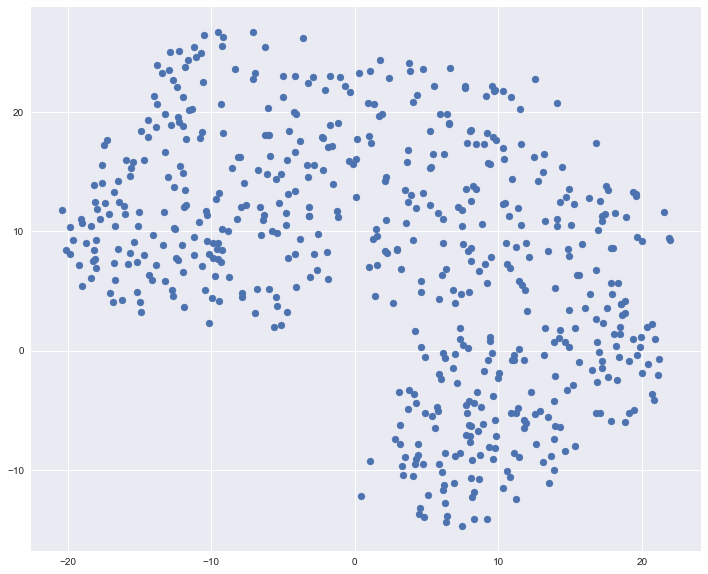

In [9]:
plt.figure(figsize=(12,10))
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1]);

**Раскрасьте каждую точку красным или зеленым цветом в зависимости от значения целевого признака (красный – злокачественная опухоль, зеленый – доброкачественная).**

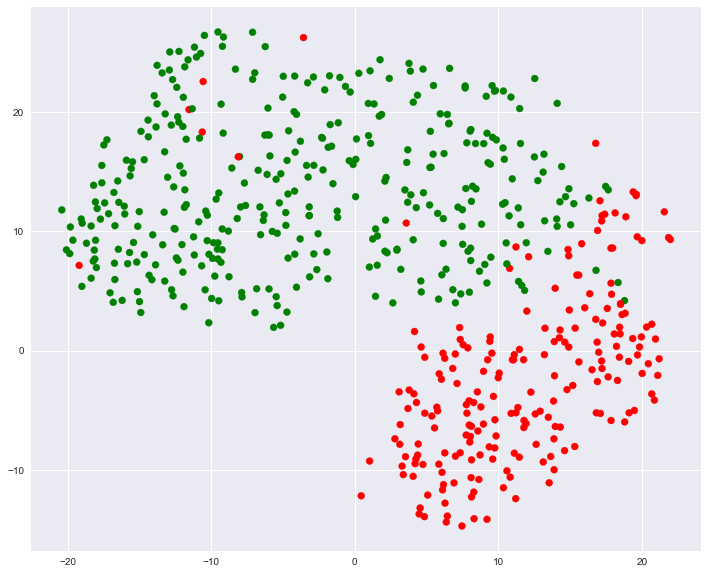

In [10]:
plt.figure(figsize=(12,10))
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1], 
            c=['red' if el == 0 else 'green' for el in y]);

<font color='red'>Вопрос 1:</font> Выберите верные утверждения:

 - Четко выделяются 4 кластера
 - Красные и зеленые точки (злокачественные и доброкачественные опухоли) сильно перемешаны
 - Четкие кластеры не выделяются
 - Красные и зеленые точки в основном располагаются в разных областях пространства

**Обучите на масштабированных данных алгоритм кластеризации `k-Means` (ищем 2 кластера, 50 итераций алгоритма, `random_state`=17), изобразите получившиеся кластеры, раскрасив t-SNE представление 2 цветами в зависимости от кластера.**

In [11]:
kmeans = KMeans(n_clusters=2, n_init=50, random_state=17).fit(X_scaled)

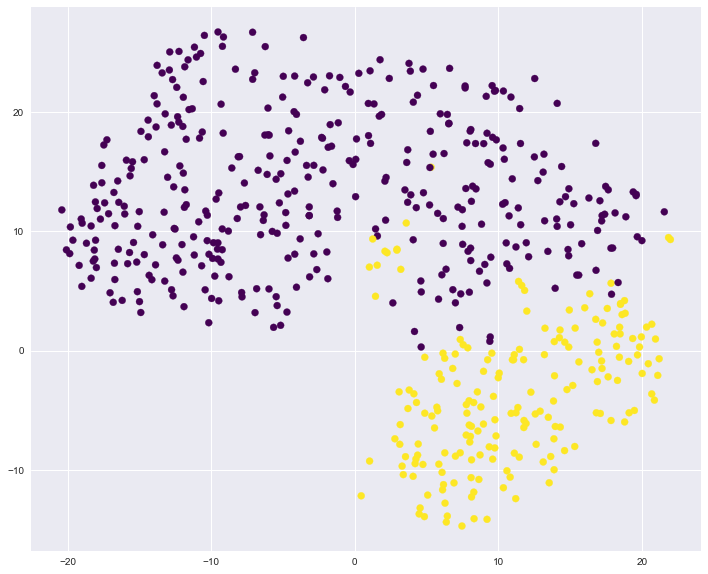

In [12]:
plt.figure(figsize=(12,10))
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1], 
            c=kmeans.labels_, cmap='viridis');

**С помощью `sklearn.metrics.confusion_matrix` проверьте, насколько полученная кластеризация соотносится с реальными метками классов.**

In [13]:
metrics.confusion_matrix(y, kmeans.labels_)

array([[ 37, 175],
       [343,  14]])

**Посчитайте гомогенность, полноту и V-меру данной кластеризации.**

In [14]:
print('Homogeneity =', metrics.homogeneity_score(y, kmeans.labels_))
print('Completeness =', metrics.completeness_score(y, kmeans.labels_))
print('V-measure =', metrics.v_measure_score(y, kmeans.labels_))

Homogeneity = 0.544273910209
Completeness = 0.565350876827
V-measure = 0.554612218411


**Теперь сделайте все то же самое для алгомеративной кластеризации  – `sklearn.cluster.AgglomerativeClustering` с настройками по умолчанию – отобразите результаты, матрицу ошибок, посчитайте гомогенность, полноту и V-меру данной кластеризации.**

In [15]:
aggl = AgglomerativeClustering().fit(X_scaled)

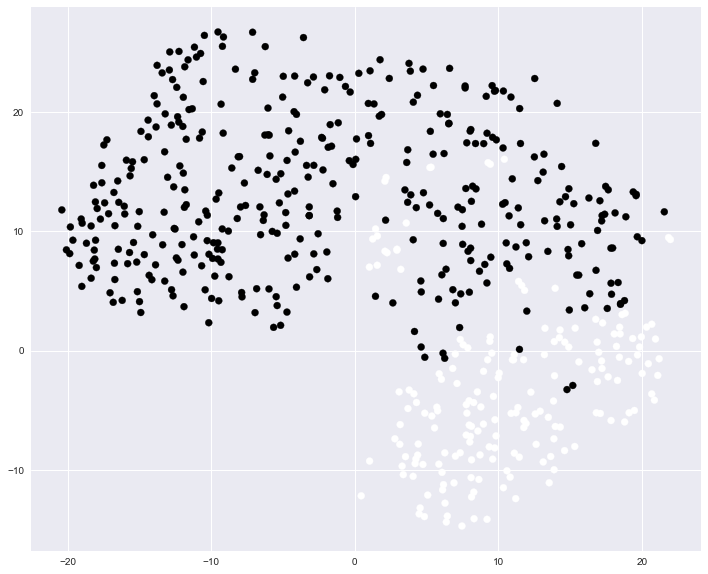

In [16]:
plt.figure(figsize=(12,10))
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1], 
            c=aggl.labels_);

In [17]:
metrics.confusion_matrix(y, aggl.labels_)

array([[164,  48],
       [ 20, 337]])

In [18]:
print('Homogeneity =', metrics.homogeneity_score(y, aggl.labels_))
print('Completeness =', metrics.completeness_score(y, aggl.labels_))
print('V-measure =', metrics.v_measure_score(y, aggl.labels_))

Homogeneity = 0.446213866913
Completeness = 0.468141847671
V-measure = 0.45691492005


<font color='red'>Вопрос 2:</font> Верно ли утверждение?

 - В задаче кластеризации данных UCI Breast Cancer алгоритм kMeans сработал лучше, чем агломеративная кластеризация (по крайней мере, при указанных параметрах)

## Рукописные цифры MNIST

In [19]:
digits = load_digits()
X, y = digits.data, digits.target

In [20]:
X.shape

(1797, 64)

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Визуализируйте данные в 2D-проекции, используя PCA. Предварительно отмасштабируйте выборку. Раскрасьте каждую точку в зависимости от целевого класса.**

Projecting 64-dimensional data to 2D


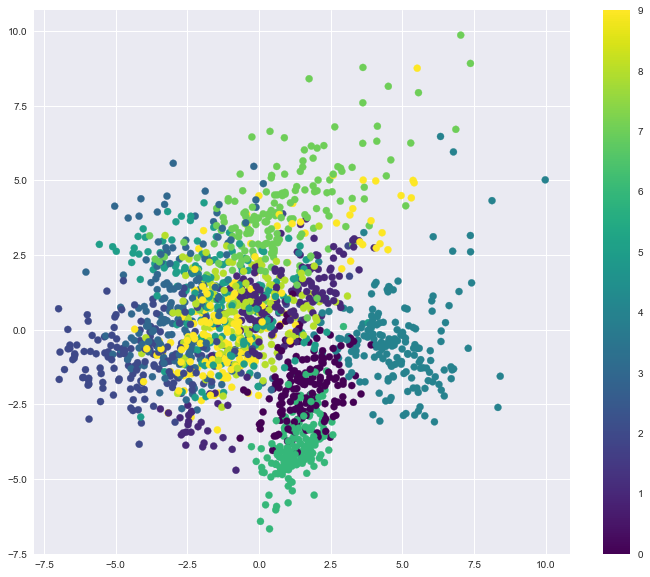

In [22]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

print('Projecting %d-dimensional data to 2D' % X.shape[1])

plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis', s=50)
plt.colorbar()
plt.show()

**Используйте алгоритм `t-SNE` для построения двухмерного представления данных. Примените его к масштабированной выборке. Зафиксируйте `random_state`=17.**

In [23]:
%%time
tsne = TSNE(random_state=17)
tsne_representation = tsne.fit_transform(X_scaled)

CPU times: user 8.92 s, sys: 903 ms, total: 9.82 s
Wall time: 9.26 s


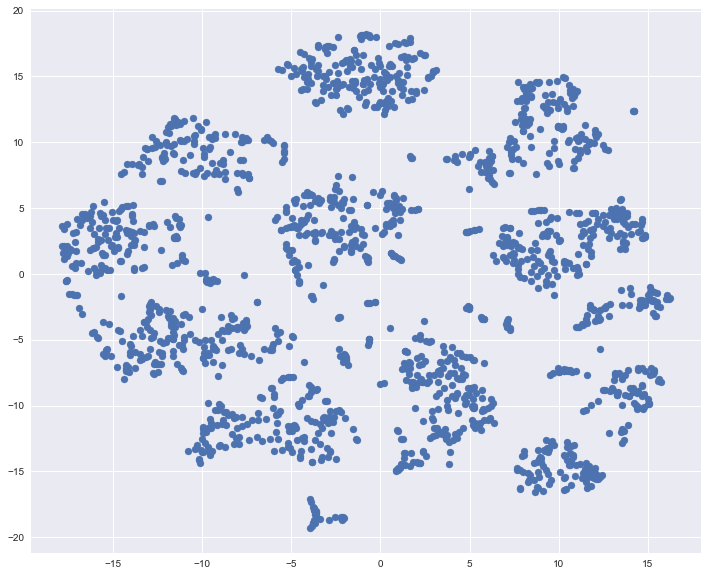

In [24]:
plt.figure(figsize=(12,10))
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1]);

**Раскрасьте каждую точку на картинке одним из цветов в зависимости от целевого класса (того, какая это рукописаня цифра). Используйте метод `colorbar` из `matplotlib.pyplot`, чтоб понять, какой цифре какой цвет соответствует.**

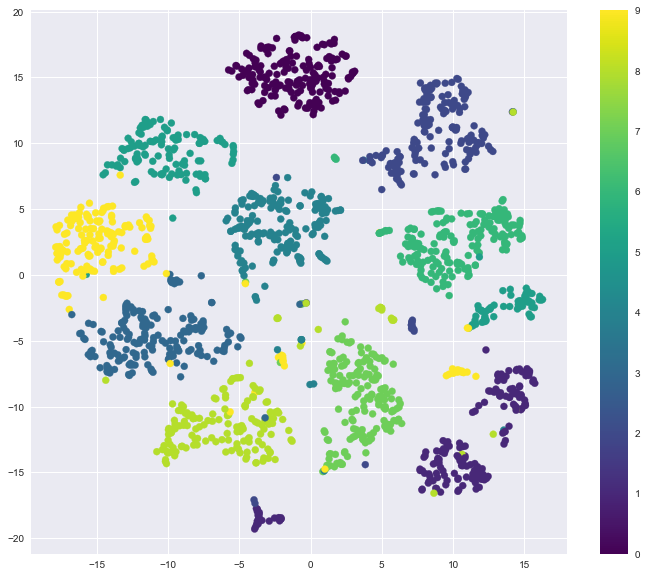

In [25]:
plt.figure(figsize=(12,10))
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1], 
            c=y, cmap='viridis')
plt.colorbar();

<font color='red'>Вопрос 3:</font> Выберите верные утверждения:

 - Четко выделяются 10 кластеров
 - Выделяются более 10 кластеров
 - Выделяются менее 10 кластеров
 - t-SNE представление оказалось более полезным для решения задачи кластеризации рукописных цифр, чем PCA

**Обучите на исходных масштабированных данных алгоритм кластеризации `k-Means` (ищем 10 кластеров, 50 итераций алгоритма, `random_state`=17), изобразите получившиеся кластеры, раскрасив `t-SNE` представление 10 цветами в зависимости от кластера.**

In [26]:
kmeans = KMeans(n_clusters=10, n_init=50, random_state=17).fit(X_scaled)

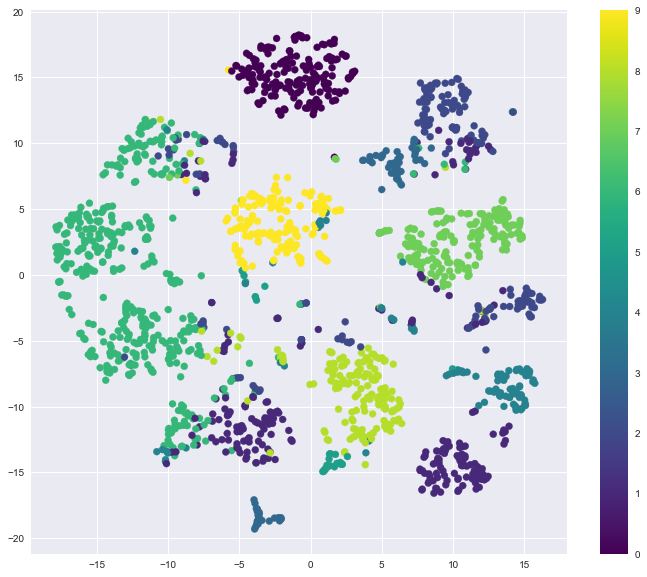

In [27]:
plt.figure(figsize=(12,10))
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1], 
            c=kmeans.labels_, cmap='viridis');
plt.colorbar();

**Выведите матрицу ошибок так, чтоб понять, из объектов какого класса состоит каждый кластер.**

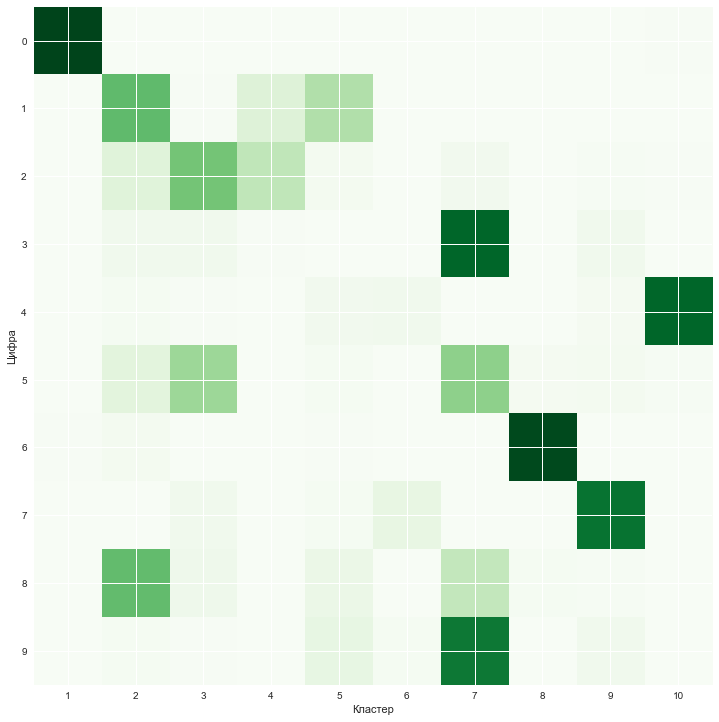

In [28]:
M = metrics.confusion_matrix(y, kmeans.labels_)

plt.figure(figsize=(10,10))
im = plt.imshow(M, interpolation='nearest', cmap='Greens')
tick_marks = np.arange(len(np.unique(y)))
plt.xticks(tick_marks , [str(i + 1) for i in range(10)])
plt.yticks(tick_marks, [str(i) for i in range(10)])
plt.tight_layout()
plt.ylabel('Цифра')
plt.xlabel('Кластер')
plt.show()

<font color='red'>Вопрос 4:</font> Кластеры, полученные `k-Means`, будем считать с 1 (от 1 до 10). Выберите верные утверждения:

 - Кластер 1 состоит почти что только из рукописных нулей
 - 10 кластеров получились примерно одинаковыми по размерам
 - Есть 2 кластера, в которые попало менее 100 объектов
 - Кластер 10 более "чистый" (в терминах условной энтропии), чем кластер 5

**Посчитайте гомогенность, полноту и V-меру данной кластеризации.**

In [29]:
print('Homogeneity =', metrics.homogeneity_score(y, kmeans.labels_))
print('Completeness =', metrics.completeness_score(y, kmeans.labels_))
print('V-measure =', metrics.v_measure_score(y, kmeans.labels_))

Homogeneity = 0.605265415969
Completeness = 0.65216019323
V-measure = 0.627838351225


**Теперь сделайте все то же самое для алгомеративной кластеризации  – `sklearn.cluster.AgglomerativeClustering` с настройками по умолчанию (только поменяйте на 10 кластеров) – отобразите результаты, матрицу ошибок, посчитайте гомогенность, полноту и V-меру данной кластеризации.**

In [31]:
aggl = AgglomerativeClustering(n_clusters=10).fit(X_scaled)

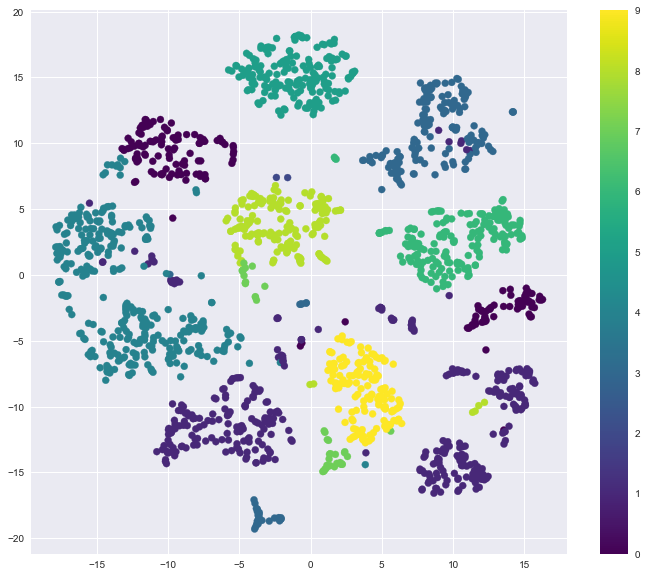

In [32]:
plt.figure(figsize=(12,10))
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1], 
            c=aggl.labels_, cmap='viridis');
plt.colorbar();

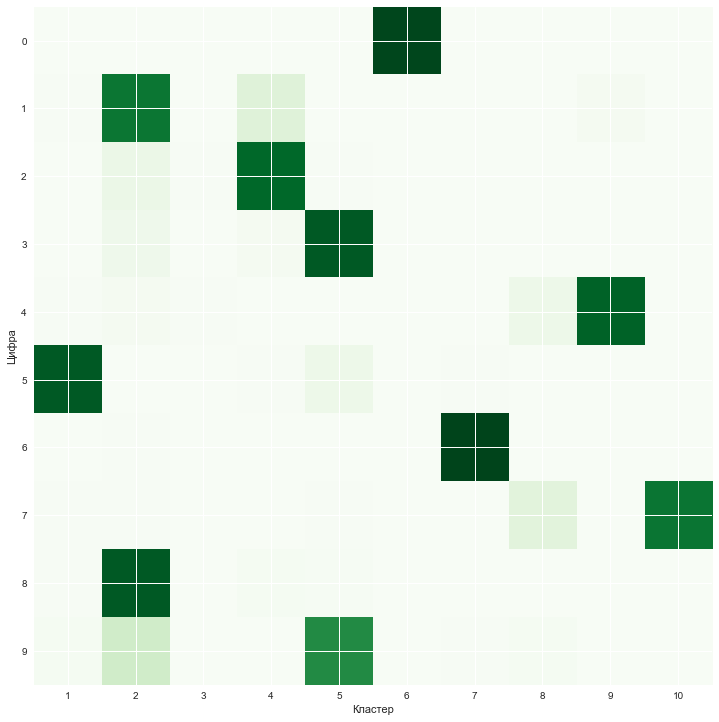

In [33]:
M = metrics.confusion_matrix(y, aggl.labels_)

plt.figure(figsize=(10,10))
im = plt.imshow(M, interpolation='nearest', cmap='Greens')
tick_marks = np.arange(len(np.unique(y)))
plt.xticks(tick_marks , [str(i + 1) for i in range(10)])
plt.yticks(tick_marks, [str(i) for i in range(10)])
plt.tight_layout()
plt.ylabel('Цифра')
plt.xlabel('Кластер')
plt.show()

In [34]:
print('Homogeneity =', metrics.homogeneity_score(y, aggl.labels_))
print('Completeness =', metrics.completeness_score(y, aggl.labels_))
print('V-measure =', metrics.v_measure_score(y, aggl.labels_))

Homogeneity = 0.758491407033
Completeness = 0.836498454946
V-measure = 0.795587364155


<font color='red'>Вопрос 5:</font> Верно ли утверждение?

 - В задаче кластеризации рукописных цифр алгоритм kMeans сработал лучше, чем агломеративная кластеризация (по крайней мере, при указанных параметрах).